# **Analisis de Datos de Ventas de Videojuegos**

Objetivos: Realizar un analisis exploratorio de un conjunto de datos sobre ventas de videojuegos a nivel mundial para responder preguntas especificas y extraer insigths valiosos sobre las tendencias de la industria

## **1. Carga y Limpieza de Datos**

#### **Importar librerias**

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Cargar el archivo con los datos**

In [133]:
df = pd.read_csv('/content/videojuegos.csv')
df

,Nombre,Plataforma,Año_de_lanzamiento,Género,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Global
0,Super Mario Bros.,NES,1985,Platform,Nintendo,8.91,2.41,2.61,1.13,8.22
1,Call of Duty: Infinite Warfare,PS4,2016,Shooter,Activision,9.66,6.88,2.79,2.11,7.93
2,The Legend of Zelda: Breath of the Wild,Switch,2017,Action-Adventure,Nintendo,9.76,2.96,0.73,0.82,16.21
3,FIFA 21,PS4,2020,Sports,EA Sports,4.34,2.95,0.13,0.88,8.22
4,Minecraft,PC,2011,Sandbox,Mojang,3.50,1.24,4.82,1.19,16.42
5,The Witcher 3: Wild Hunt,PS4,2015,RPG,CD Projekt,1.68,5.45,4.46,1.46,6.75
6,Overwatch,PC,2016,Shooter,Blizzard,1.15,6.04,2.60,2.48,2.29
7,Pokemon Go,Mobile,2016,Augmented Reality,Niantic,2.35,3.47,4.73,0.67,7.29
8,GTA V,PS4,2013,Action-Adventure,Rockstar Games,1.57,3.32,3.43,0.77,10.80
9,Animal Crossing: New Horizons,Switch,2020,Simulation,Nintendo,3.35,4.27,2.83,0.98,11.36


In [134]:
df.dtypes

,0
Nombre,object
Plataforma,object
Año_de_lanzamiento,int64
Género,object
Editor,object
Ventas_NA,float64
Ventas_EU,float64
Ventas_JP,float64
Ventas_Otros,float64
Ventas_Global,float64


#### **Verificar y manejar valores faltantes en las columnas criticas**




In [135]:
df.count() # Para verificar la cantidad de datos no nulos por columna

,0
Nombre,10
Plataforma,10
Año_de_lanzamiento,10
Género,10
Editor,10
Ventas_NA,10
Ventas_EU,10
Ventas_JP,10
Ventas_Otros,10
Ventas_Global,10


In [136]:
df.isnull() # Para reconocer cuando un objeto es nulo con true y False

,Nombre,Plataforma,Año_de_lanzamiento,Género,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Global
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [137]:
df.isnull().sum() # Para verificar la cantidad de datos nulos por columna

,0
Nombre,0
Plataforma,0
Año_de_lanzamiento,0
Género,0
Editor,0
Ventas_NA,0
Ventas_EU,0
Ventas_JP,0
Ventas_Otros,0
Ventas_Global,0


In [138]:
df.size-df.isnull().sum().sum()  # Conteo total para verificar la cantidad de datos no nulos en todo el DataFrame

100

#### **Verificar si la columna 'Año de lanzamiento' esta en formato adecuado**

In [139]:
print(df['Año_de_lanzamiento'].dtype) # Para verificar el tipo de dato

int64


In [140]:
print(df['Año_de_lanzamiento'].head()) # Para verificar los primeros 5 registros

0    1985
1    2016
2    2017
3    2020
4    2011
Name: Año_de_lanzamiento, dtype: int64


#### **Convertir la columna de 'año de lanzamiento' a formato fecha**

In [141]:
df['Año_de_lanzamiento'] = pd.to_datetime(df['Año_de_lanzamiento'], errors='coerce', format='%Y'). dt.year

In [142]:
print(df['Año_de_lanzamiento'].dtype)

int32


In [143]:
print(df['Año_de_lanzamiento'].head())

0    1985
1    2016
2    2017
3    2020
4    2011
Name: Año_de_lanzamiento, dtype: int32


## 2. Analisis exploratorio de Datos

#### **Calcular el numero total de juegos lanzados por año**


In [165]:
juegos_por_ano = df.groupby('Año_de_lanzamiento').size()
juegos_por_ano

,0
Año_de_lanzamiento,
1985,1
2011,1
2013,1
2015,1
2016,3
2017,1
2020,2


In [145]:
juegos_por_ano = df.groupby('Año_de_lanzamiento').size().reset_index(name='Cantidad de juegos')
juegos_por_ano # Calcular el número total de juegos lanzados por año y obtener un DataFrame

,Año_de_lanzamiento,Cantidad de juegos
0,1985,1
1,2011,1
2,2013,1
3,2015,1
4,2016,3
5,2017,1
6,2020,2


#### **Identificar las 10 plataformas con mas titulos lanzados**

In [146]:
df

,Nombre,Plataforma,Año_de_lanzamiento,Género,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Global
0,Super Mario Bros.,NES,1985,Platform,Nintendo,8.91,2.41,2.61,1.13,8.22
1,Call of Duty: Infinite Warfare,PS4,2016,Shooter,Activision,9.66,6.88,2.79,2.11,7.93
2,The Legend of Zelda: Breath of the Wild,Switch,2017,Action-Adventure,Nintendo,9.76,2.96,0.73,0.82,16.21
3,FIFA 21,PS4,2020,Sports,EA Sports,4.34,2.95,0.13,0.88,8.22
4,Minecraft,PC,2011,Sandbox,Mojang,3.50,1.24,4.82,1.19,16.42
5,The Witcher 3: Wild Hunt,PS4,2015,RPG,CD Projekt,1.68,5.45,4.46,1.46,6.75
6,Overwatch,PC,2016,Shooter,Blizzard,1.15,6.04,2.60,2.48,2.29
7,Pokemon Go,Mobile,2016,Augmented Reality,Niantic,2.35,3.47,4.73,0.67,7.29
8,GTA V,PS4,2013,Action-Adventure,Rockstar Games,1.57,3.32,3.43,0.77,10.80
9,Animal Crossing: New Horizons,Switch,2020,Simulation,Nintendo,3.35,4.27,2.83,0.98,11.36


In [166]:
titulos_lanzados = df.groupby('Plataforma').size().reset_index(name='Cantidad de titulos')
titulos_lanzados.sort_values(by='Cantidad de titulos', ascending=False).head(10)

,Plataforma,Cantidad de titulos
3,PS4,4
2,PC,2
4,Switch,2
0,Mobile,1
1,NES,1


#### **Determinar los 5 generos mas populares en terminos de cantidad de juegos**

In [167]:
generos_mas_populares = df.groupby('Género').size().reset_index(name='Cantidad de juegos')
generos_mas_populares.sort_values(by='Cantidad de juegos', ascending=False).head(5)

,Género,Cantidad de juegos
0,Action-Adventure,2
5,Shooter,2
1,Augmented Reality,1
2,Platform,1
3,RPG,1


## 3. Análisis de Ventas

#### **Calcular las ventas totales por region y compararlas**

In [149]:
ventas_totales_por_region = df[['Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Ventas_Otros', 'Ventas_Global']].sum()
ventas_totales_por_region

,0
Ventas_NA,46.27
Ventas_EU,38.99
Ventas_JP,29.13
Ventas_Otros,12.49
Ventas_Global,95.49


#### **Encontrar el videojuego mas vendido de cada genero**

In [168]:
videojuego_mas_vendido_por_genero = df.groupby('Ventas_Global').agg({'Género': 'first', 'Nombre': 'first'}).reset_index()
videojuego_mas_vendido_por_genero

,Ventas_Global,Género,Nombre
0,2.29,Shooter,Overwatch
1,6.75,RPG,The Witcher 3: Wild Hunt
2,7.29,Augmented Reality,Pokemon Go
3,7.93,Shooter,Call of Duty: Infinite Warfare
4,8.22,Platform,Super Mario Bros.
5,10.80,Action-Adventure,GTA V
6,11.36,Simulation,Animal Crossing: New Horizons
7,16.21,Action-Adventure,The Legend of Zelda: Breath of the Wild
8,16.42,Sandbox,Minecraft


#### **Analizar las tendencias de ventas de los videojuegos a lo largo de los años**

In [151]:
tendencias_ventas_por_ano = df.groupby(['Editor', 'Género', 'Año_de_lanzamiento'])[['Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Ventas_Otros']].sum()
tendencias_ventas_por_ano

Ventas_NA  Ventas_EU  \
Editor         Género            Año_de_lanzamiento                         
Activision     Shooter           2016                     9.66       6.88   
Blizzard       Shooter           2016                     1.15       6.04   
CD Projekt     RPG               2015                     1.68       5.45   
EA Sports      Sports            2020                     4.34       2.95   
Mojang         Sandbox           2011                     3.50       1.24   
Niantic        Augmented Reality 2016                     2.35       3.47   
Nintendo       Action-Adventure  2017                     9.76       2.96   
               Platform          1985                     8.91       2.41   
               Simulation        2020                     3.35       4.27   
Rockstar Games Action-Adventure  2013                     1.57       3.32   

                                                     Ventas_JP  Ventas_Otros  
Editor         Género            Año_de_lanzamiento                           
Activision     Shooter           2016                     2.79          2.11  
Blizzard       Shooter           2016                     2.60          2.48  
CD Projekt     RPG               2015                     4.46          1.46  
EA Sports      Sports            2020                     0.13          0.88  
Mojang         Sandbox           2011                     4.82          1.19  
Niantic        Augmented Reality 2016                     4.73          0.67  
Nintendo       Action-Adventure  2017                     0.73          0.82  
               Platform          1985                     2.61          1.13  
               Simulation        2020                     2.83          0.98  
Rockstar Games Action-Adventure  2013                     3.43          0.77

#### **Graficos de tendencias de ventas de los videojuegos a lo largo de los años**

<Figure size 1000x600 with 0 Axes>

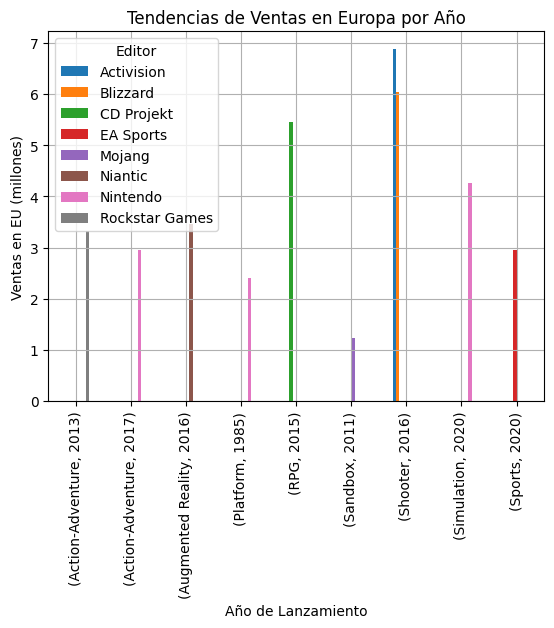

In [152]:
plt.figure(figsize=(10, 6)) # Crea una figura de tamaño específico (10x6 pulgadas).
tendencias_ventas_por_ano['Ventas_EU'].unstack(level=0).plot(kind='bar') # Desapila el nivel de la agrupación para separar las ventas por editor y graficarlas por año.
plt.title('Tendencias de Ventas en Europa por Año') # Titulo del grafico.
plt.xlabel('Año de Lanzamiento') # Titulo del eje x.
plt.ylabel('Ventas en EU (millones)') # Titulo del eje y.
plt.legend(title='Editor', loc='upper left') # Le asigno un nombre a la caja de leyenda(Editor) que me aparecera en la esquina superior derecha del grafico(con loc='upper left').
plt.grid(True) # Añade una cuadrícula al gráfico para mejor visualización.
plt.show() # Muestra el gráfico.

<Figure size 1000x600 with 0 Axes>

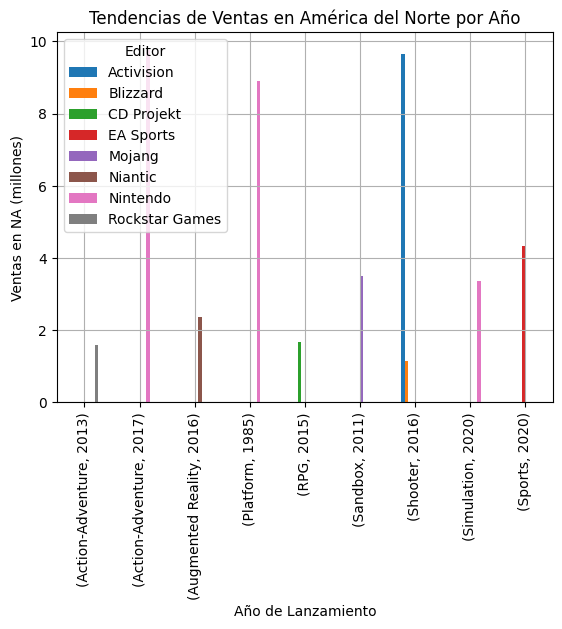

In [153]:
plt.figure(figsize=(10, 6))
tendencias_ventas_por_ano['Ventas_NA'].unstack(level=0).plot(kind='bar')
plt.title('Tendencias de Ventas en América del Norte por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas en NA (millones)')
plt.legend(title='Editor', loc='upper left')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

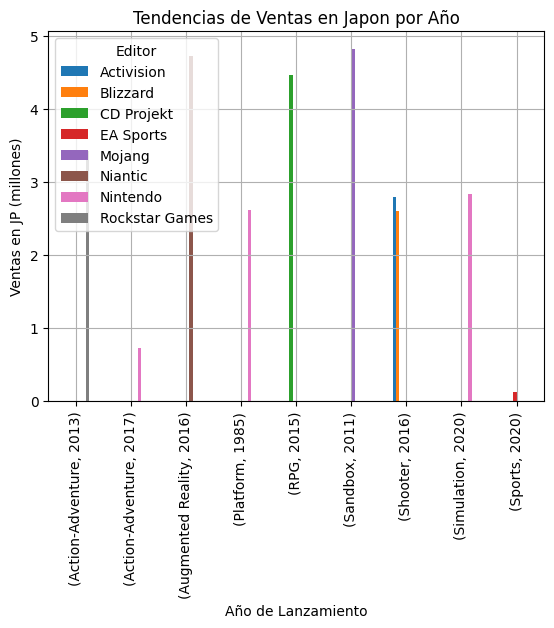

In [154]:
plt.figure(figsize=(10, 6))
tendencias_ventas_por_ano['Ventas_JP'].unstack(level=0).plot(kind='bar')
plt.title('Tendencias de Ventas en Japon por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas en JP (millones)')
plt.legend(title='Editor', loc='upper left')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

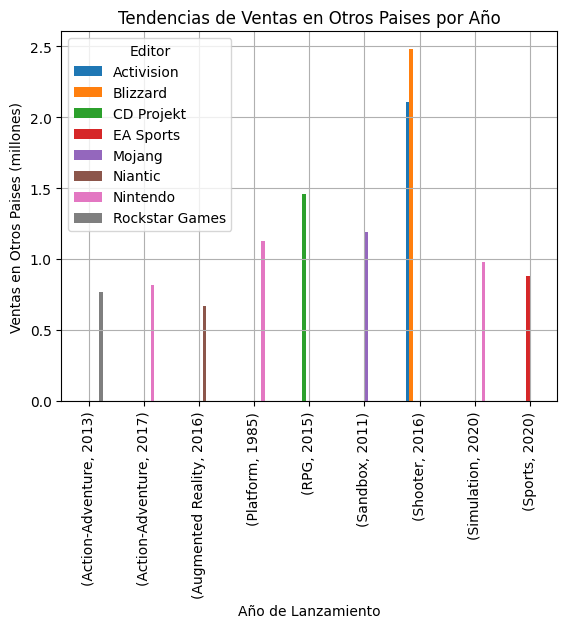

In [155]:
plt.figure(figsize=(10, 6))
tendencias_ventas_por_ano['Ventas_Otros'].unstack(level=0).plot(kind='bar')
plt.title('Tendencias de Ventas en Otros Paises por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas en Otros Paises (millones)')
plt.legend(title='Editor', loc='upper left')
plt.grid(True)
plt.show()

## 4. Visualizacion de Datos

#### **Crear graficos para visualizar el numero de juegos lanzados cada año**

In [156]:
juegos_por_ano = df.groupby('Año_de_lanzamiento').size().reset_index(name='Cantidad de juegos')
juegos_por_ano

,Año_de_lanzamiento,Cantidad de juegos
0,1985,1
1,2011,1
2,2013,1
3,2015,1
4,2016,3
5,2017,1
6,2020,2


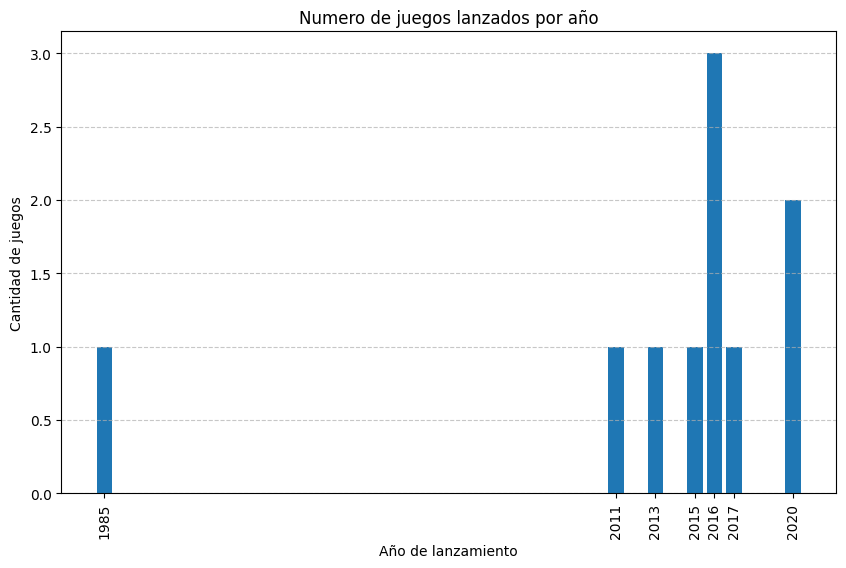

In [157]:
plt.figure(figsize=(10, 6))
plt.bar(juegos_por_ano['Año_de_lanzamiento'], juegos_por_ano['Cantidad de juegos'])
plt.title('Numero de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(ticks=juegos_por_ano['Año_de_lanzamiento'], rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### **Graficar las ventas globales por genero**

In [158]:
tabla_ventas_por_genero = df.groupby('Género')['Ventas_Global'].sum().reset_index() # Sumo las ventas globales agrupadas por el mismo genero
tabla_ventas_por_genero

,Género,Ventas_Global
0,Action-Adventure,27.01
1,Augmented Reality,7.29
2,Platform,8.22
3,RPG,6.75
4,Sandbox,16.42
5,Shooter,10.22
6,Simulation,11.36
7,Sports,8.22


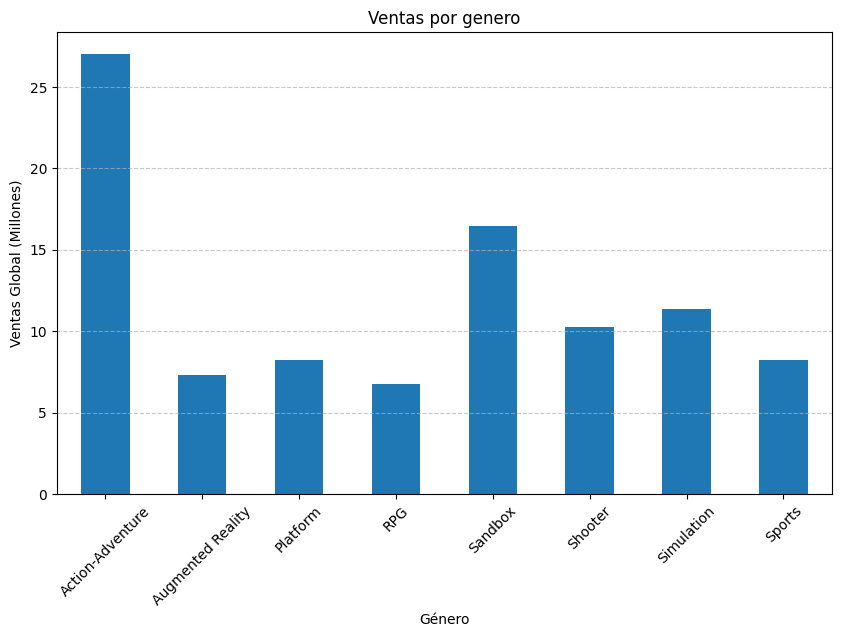

In [159]:
plt.figure(figsize=(10, 6))
df.groupby('Género')['Ventas_Global'].sum().plot(kind='bar', title='Ventas por genero')
plt.xlabel('Género')
plt.ylabel('Ventas Global (Millones)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### **Realizar un grafico de barras que muestre las ventas por plataforma**

In [160]:
tabla_ventas_por_plataforma = df.groupby('Plataforma')['Ventas_Global'].sum().reset_index()
tabla_ventas_por_plataforma

,Plataforma,Ventas_Global
0,Mobile,7.29
1,NES,8.22
2,PC,18.71
3,PS4,33.70
4,Switch,27.57


In [161]:
tabla_ventas_por_plataforma = tabla_ventas_por_plataforma.sort_values(by='Ventas_Global', ascending=True)
tabla_ventas_por_plataforma

,Plataforma,Ventas_Global
0,Mobile,7.29
1,NES,8.22
2,PC,18.71
4,Switch,27.57
3,PS4,33.70


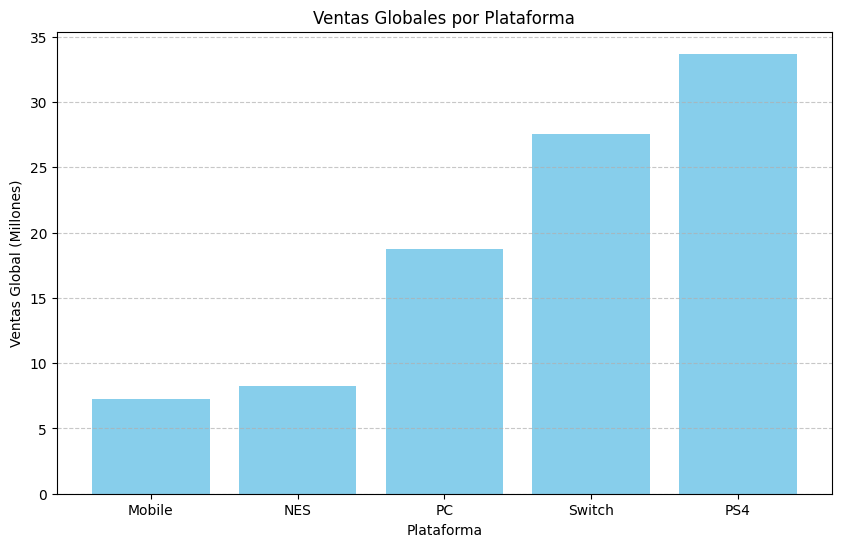

In [162]:
plt.figure(figsize=(10, 6))
plt.bar(tabla_ventas_por_plataforma['Plataforma'], tabla_ventas_por_plataforma['Ventas_Global'], color='skyblue')
plt.title('Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Global (Millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Insights y Conclusiones

#### **Extraer al menos tres insights interesantes del análisis**

In [164]:

# Insight 1: Identificar el año con mayor lanzamiento de juegos.
año_max_lanzamientos = juegos_por_ano.loc[juegos_por_ano['Cantidad de juegos'].idxmax()]
print(f"El año con mayor cantidad de lanzamientos fue {año_max_lanzamientos['Año_de_lanzamiento']} con {año_max_lanzamientos['Cantidad de juegos']} juegos.")

# Insight 2: Encontrar la plataforma con mayores ventas globales.
plataforma_max_ventas = tabla_ventas_por_plataforma.loc[tabla_ventas_por_plataforma['Ventas_Global'].idxmax()]
print(f"La plataforma con mayores ventas globales es {plataforma_max_ventas['Plataforma']} con {plataforma_max_ventas['Ventas_Global']} millones de dolares en ventas.")

# Insight 3:  Determinar el género con mayores ventas globales.
genero_max_ventas = tabla_ventas_por_genero.loc[tabla_ventas_por_genero['Ventas_Global'].idxmax()]
print(f"El género con mayores ventas globales es {genero_max_ventas['Género']} con {genero_max_ventas['Ventas_Global']} millones de dolares en ventas.")


El año con mayor cantidad de lanzamientos fue 2016 con 3 juegos.
La plataforma con mayores ventas globales es PS4 con 33.7 millones de dolares en ventas.
El género con mayores ventas globales es Action-Adventure con 27.01 millones de dolares en ventas.


#### **Escribir conclusiones sobre las tendencias en la industria de videojuegos en el análisis**

Basándonos en el análisis de los datos de ventas de videojuegos, podemos extraer las siguientes conclusiones sobre las tendencias de la industria:

1. Crecimiento y Declive del Mercado: Se observa una tendencia de crecimiento en el número de juegos lanzados hasta el año 2016, después del cual la cantidad disminuye, lo que sugiere una posible saturación del mercado o cambios en las estrategias de las empresas desarrolladoras.

2. Dominio de Plataformas y Géneros:  Las plataformas Switch y PS4 han mostrado una mayor concentración de ventas globales, lo que indica su predominio en el mercado y la preferencia del público por dichas plataformas.  Asimismo, el género Action-Adventure lidera en ventas, lo que sugiere que este tipo de juegos siguen siendo muy populares entre los jugadores.

3. Regionalización de las Ventas:  Se identificaron diferencias notables en las ventas por regiones.  Ventas_NA Y Ventas_JP, lo que implica que las estrategias de marketing y distribución deberían adaptarse a las preferencias de cada mercado.

4. Evolución del Mercado: Se identificó el año con mayor lanzamiento de juegos, lo cual nos indica un momento de auge del mercado. Si bien, la plataforma con mayores ventas globales ha variado a través de los años, los géneros de juegos que más se venden siguen siendo populares a lo largo del tiempo. Esto último nos indica que las preferencias de los consumidores son relativamente constantes, pero también abre la posibilidad a nuevas tendencias que pueden ser observadas en próximos análisis.